In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install numpy
%pip install matplotlib
%pip install torchvision

clear_output()

Note: We're using torch modules (datasets, dataloaders) to download dataset and easily make batches. The NN will be made in numpy and every step will be implemented ourselves

In [3]:
import numpy as np

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from torchvision.transforms.functional import to_tensor

import matplotlib.pyplot as plt

#Contents:

1. Implementation of 2 layer NN from scratch using numpy which classifies MNIST dataset

About MNIST:

the dataset consists of images of 28x28 size. The image each contains a handwritten digit from 0 to 9. Our model needs to take this image and classify it to the correct digit.


You need to know:

1. **numpy** (for impelementation)
2. a little bit of **matplotlib** (for visualization)


Good to have knowledge of:

1. torch dataset and dataloader (details of the functions is given anyways)

In [29]:
# MNIST function fetches the MNIST dataset. Without any transform param, the returned object is a Pillow image but we want to convert it to numerical form
# that is to say, a numpy array/torch tensor

# to_tensor is used to avoid errors when creating data loader later. we'll convert them to numpy arrays when the time comes
train_data = MNIST(root='./datasets', train=True, download=True, transform=to_tensor)
test_data  = MNIST(root='./datasets', train=True, download=True, transform=to_tensor)

clear_output()

In [30]:
batch_size = 64

# Dataloaders are used to easily create batches of data so we can perform batch gradient descent for faster learning
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

Here's how our 2 layer NN will work.

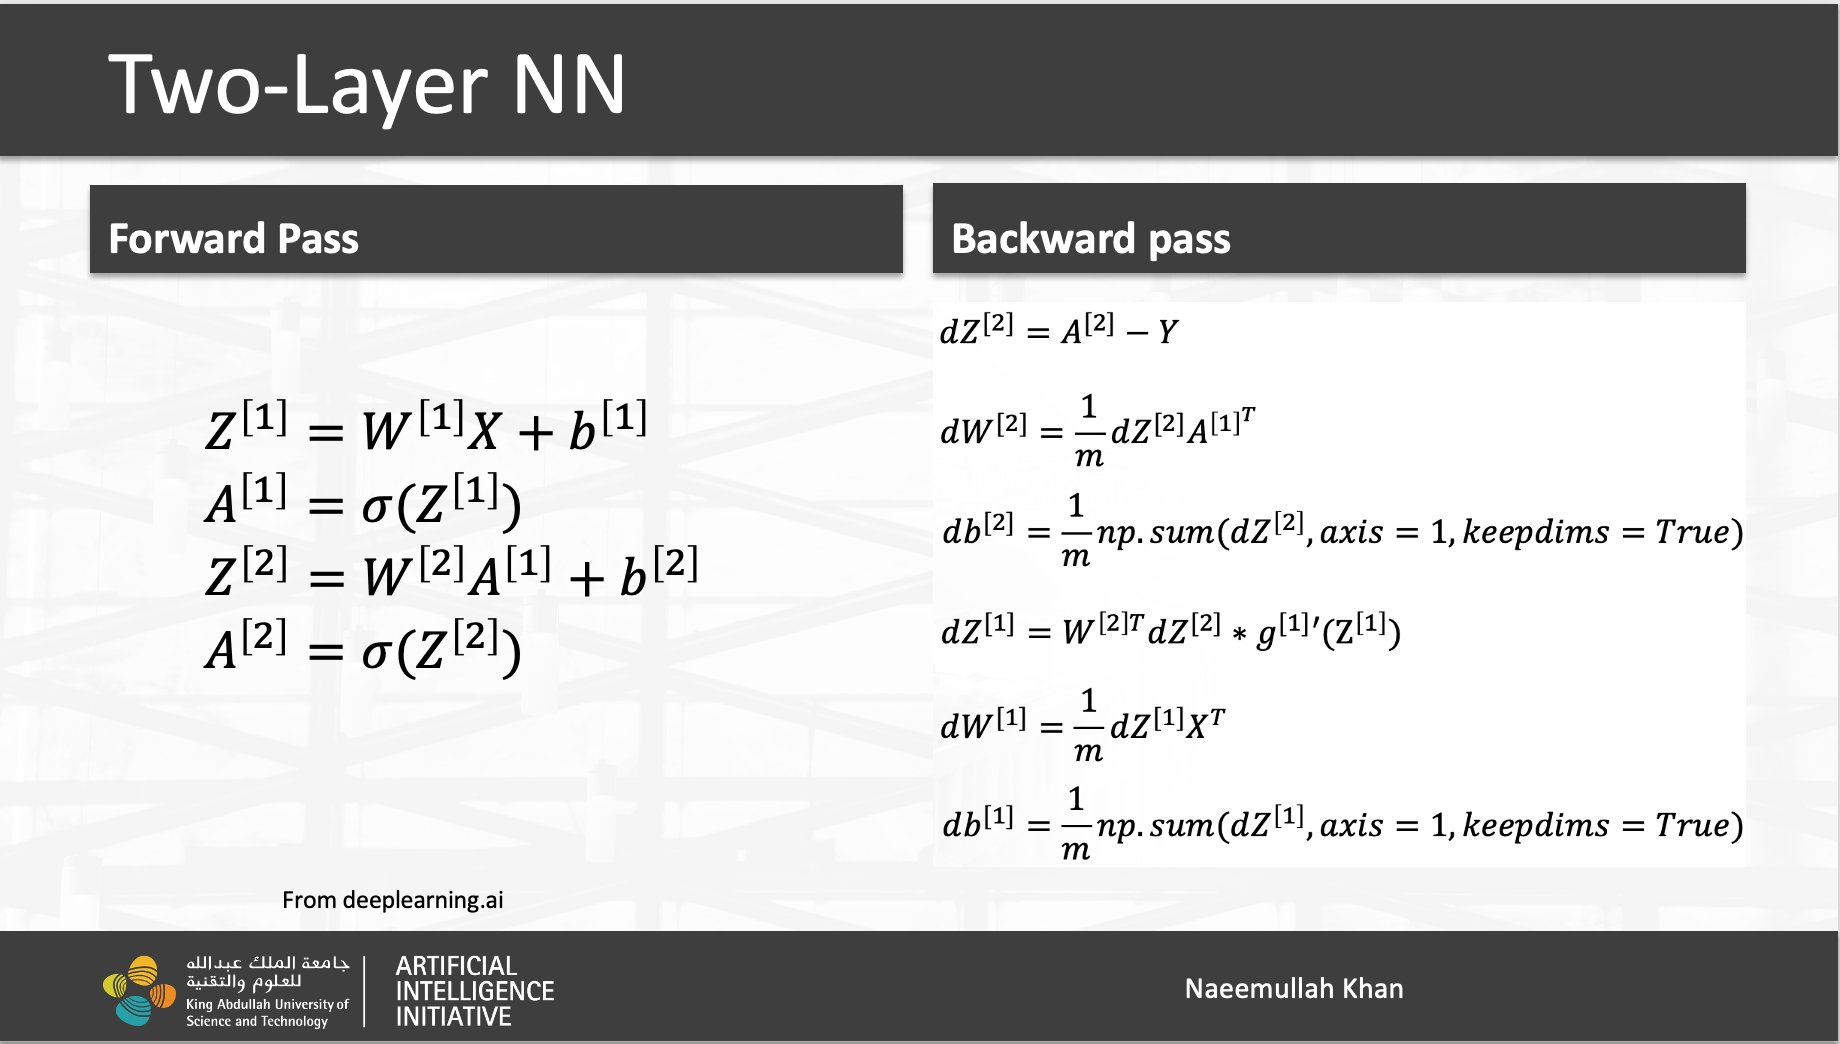

## The main training loop, with batch gradient descent.



### helper functions for the model

In [16]:
def get_z(X, W, b):
  return W@X+b

def sigmoid(Z):
  return 1/(1+np.exp(-Z))

def cross_entropy_loss(yhat, y):
  l = np.mean(np.sum(-y*np.log(yhat), axis = 0))
  return l

### Declare the model

declaring the number of params, the model layers and hyper params (learning rate, number of epochs, etc)

In [33]:
ni = 28*28                   # no of input feature
nh = 50                      # no of hidden units/nodes
no = 10                      # no of out channel (has to be equal ot the number of classes)

W1 = np.random.randn(nh,ni)  # the number of rows of w1 has to equal the of hidden untis and the number of columns have to equal the number of rows of X
b1 = np.zeros((nh , 1))      # b1 is a column vector and the rows have to match z1

W2 = np.random.randn(no ,nh) # the number of rows have to be equal to out channels nad the no of columsn eaul to the number of rows of A1
b2 = np.zeros((no, 1))       # column vector, rows equal to z2

num_epochs = 12
lr = 1e-2
train_epoch_losses = []

total_train_imgs = len(train_loader.dataset)

Pre-training output

In [34]:
epoch_loss = 0
correct = 0

for X, labels in train_loader:

  X = X.numpy().reshape(-1,28*28).T
  labels = labels.numpy()

  y = np.zeros((no, X.shape[1]))
  y[labels, np.arange(y.shape[1])] = 1

  Z1 = W1@X + b1
  A1 = sigmoid(Z1)
  Z2 = W2@A1 + b2
  yhat = sigmoid(Z2)

  loss = cross_entropy_loss(yhat, y)
  epoch_loss += loss*len(labels)

  pred = np.argmax(yhat, axis = 0)
  correct += np.sum(labels == pred)

epoch_loss /= total_train_imgs
train_epoch_losses.append(epoch_loss)

print(f'loss = {epoch_loss}. {correct}/{total_train_imgs} correctly labelled.')

loss = 2.2056089200028883. 7951/60000 correctly labelled.


### Training loop

In [35]:
for i in range(num_epochs):

  epoch_loss = 0
  correct = 0

  for X, labels in train_loader:

    X = X.numpy().reshape(-1,28*28).T
    labels = labels.numpy()

    y = np.zeros((no, X.shape[1]))
    y[labels, np.arange(y.shape[1])] = 1

    #forward pass
    # Layer 1
    Z1 = W1@X + b1
    A1 = sigmoid(Z1)

    # Layer 2
    Z2 = W2@A1 + b2
    yhat = sigmoid(Z2)

    #backward pass
    dZ2 = yhat - y

    dW2 = dZ2 @ A1.T
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T @ dZ2 * A1*(1-A1)

    dW1 = dZ1 @ X.T
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # optimization (updating the weights)
    W2 -= lr*dW2
    b2 -= lr*db2
    W1 -= lr*dW1
    b1 -= lr*db1

    # calcuating classification error
    pred = np.argmax(yhat, axis = 0)
    correct += np.sum(labels == pred)

    loss = cross_entropy_loss(yhat, y)
    epoch_loss += loss*len(labels)

  epoch_loss /= total_train_imgs
  train_epoch_losses.append(epoch_loss)

  print(f'Epoch {i}, loss = {epoch_loss}. {correct}/{total_train_imgs} correctly labelled.')

Epoch 0, loss = 0.766016579438406. 47753/60000 correctly labelled.
Epoch 1, loss = 0.4355616504244272. 53647/60000 correctly labelled.
Epoch 2, loss = 0.364108264887402. 54783/60000 correctly labelled.
Epoch 3, loss = 0.32290773565494907. 55411/60000 correctly labelled.
Epoch 4, loss = 0.29471195152748003. 55817/60000 correctly labelled.
Epoch 5, loss = 0.27370994292042783. 56123/60000 correctly labelled.
Epoch 6, loss = 0.2570140468395021. 56367/60000 correctly labelled.
Epoch 7, loss = 0.2430282803361928. 56573/60000 correctly labelled.
Epoch 8, loss = 0.23099583341948357. 56759/60000 correctly labelled.
Epoch 9, loss = 0.22050071468503235. 56920/60000 correctly labelled.
Epoch 10, loss = 0.21119120713686848. 57058/60000 correctly labelled.
Epoch 11, loss = 0.2027851939339102. 57194/60000 correctly labelled.


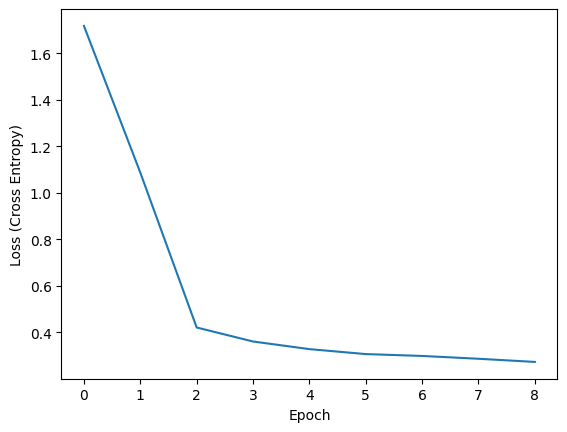

In [32]:
plt.plot(train_epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.show()